In [0]:
import os, glob, shutil
from pathlib import Path
from time import sleep

import torch
from torchvision import transforms as T
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

downloaded data successfully


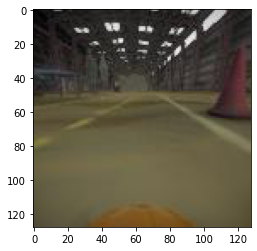

In [2]:
if not Path("./data/train/warehouse_time_step_0.jpg").is_file():
  
  # Download files
  os.system("wget 'https://www.dropbox.com/s/08vgl5wdage8nw0/data_v1.zip?dl=0' -O data.zip")
  os.system("unzip -q data.zip")
  sleep(120)
  print('downloaded data successfully')

  # Remove unnecessary files
  os.listdir('./').remove('data.zip')

  image_dir = './data_v1/'
  file_names = os.listdir(image_dir)

  # Split on train and val parts
  TRAIN_SIZE = 0.7

  parts = ['train', 'val']

  train_file_names = file_names[:int(len(file_names) * TRAIN_SIZE)]
  val_file_names = file_names[int(len(file_names) * TRAIN_SIZE):]

  # Move to corresponding folder
  for part, files in zip(parts, [train_file_names, val_file_names]):
    new_part = os.path.join(image_dir, part)
    if not os.path.exists(new_part):
      os.makedirs(new_part)
    for f in files:
      shutil.move(os.path.join(image_dir, f), new_part)

  # Show sample
  img = mpimg.imread(image_dir + parts[1] + '/' + os.listdir(new_part)[1])
  plt.imshow(img)
  plt.show()

In [0]:
class WareHouseDataset(Dataset):
    def __init__(self, image_path,  image_transform=None):
        super(WareHouseDataset, self).__init__()

        images = glob.glob(os.path.join(image_path, '*.jpg'))
        images.sort()

        self.data = list(images)
        self.image_transform = image_transform

    def __getitem__(self, idx):
        
        image_path = self.data[idx]        
        image= Image.open(image_path)
        image = self.image_transform(image)
        #print(image)
        return image 

    def __len__(self):
        return len(self.data)

In [0]:
image_transforms = {
    'train': T.ToTensor(),
    'val'  : T.ToTensor()
    }
    
datasets = {part: WareHouseDataset(os.path.join(image_dir, part), 
                                   image_transform=image_transforms[part])
            for part in parts
            }

In [0]:
batch_sizes = {'train': 32, 'val': 64}
drop_shuffle = {'train': True, 'val': False}

dataloaders = {part: torch.utils.data.DataLoader(datasets[part],
                                                  batch_size=batch_sizes[part],
                                                  shuffle=drop_shuffle[part],
                                                  num_workers=32,
                                                  drop_last=drop_shuffle[part])
               for part in parts}

In [27]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f20bb754080>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7f20bb754160>}